In [13]:
import gymnasium as gym
env= gym.make('MountainCarContinuous-v0',render_mode='rgb_array')


In [14]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [15]:
import matplotlib.pyplot as plt 
obs = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# Take the action and get the new observation space
new_obs, reward, done, trunc, info = env.step(random_action)
print("The new observation is {}".format(new_obs))



env.render()
env.close()

The initial observation is (array([-0.5007391,  0.       ], dtype=float32), {})
The new observation is [-0.5019104  -0.00117131]


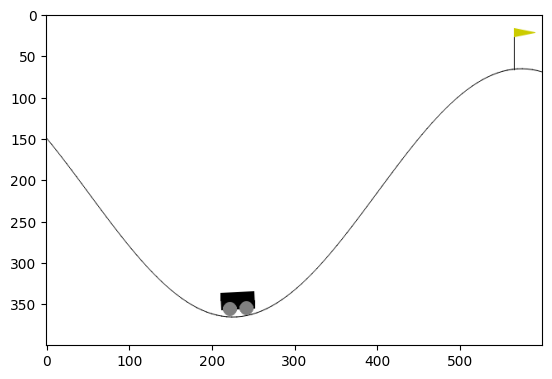

In [16]:
env_screen = env.render()
env.close()

import matplotlib.pyplot as plt 
plt.imshow(env_screen)

Start The env

In [17]:
import time
num_steps = 1500
env= gym.make('MountainCar-v0',render_mode='human')env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")env = gym.make("BreakoutNoFrameskip-v4")
obs = env.reset()


In [18]:
for step in range(num_steps):
    # take random action for now
    # action = my_smart_action(obs)
    action=env.action_space.sample()
    
    # apply the action 
    obs,reward,done,trunc,info = env.step(action)
    
    # render the environment
    env.render()
    
    # wait a bit 
    # time.sleep(0.01)
    
    if done or trunc:
        env.reset()
        
# close the env
env.close()
    
    